In [1]:
import numpy as np

def unpickle(file):
#     print(file)
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

# setting up the data
ground_data1 = unpickle("cifar-10-batches-py//data_batch_1")  
data1 = ground_data1["data"] # (1000,3072) shape
labels1 = ground_data1["labels"] # (1000,1) shape 
ground_data2 = unpickle("cifar-10-batches-py//data_batch_2")  
data2 = ground_data2["data"] # (1000,3072) shape
labels2 = ground_data2["labels"] # (1000,1) shape 
ground_data3 = unpickle("cifar-10-batches-py//data_batch_3")  
data3 = ground_data3["data"] # (1000,3072) shape
labels3 = ground_data3["labels"] # (1000,1) shape 
ground_data4 = unpickle("cifar-10-batches-py//data_batch_4")  
data4 = ground_data4["data"] # (1000,3072) shape
labels4 = ground_data4["labels"] # (1000,1) shape 
ground_data5 = unpickle("cifar-10-batches-py//data_batch_1")  
data5 = ground_data5["data"] # (1000,3072) shape
labels5 = ground_data5["labels"] # (1000,1) shape 

In [2]:
# putting all data into one matrix 
labels = np.zeros((50000,1))
data = np.zeros((50000,3072)) 
labels[:10000,0] = labels1[:]
labels[10000:10000*2,0] = labels2[:]
labels[10000*2:10000*3,0] = labels3[:]
labels[10000*3:10000*4,0] = labels4[:]
labels[10000*4:10000*5,0] = labels5[:]
data[:10000,:] = data1[:,:]
data[10000:10000*2,:] = data2[:,:]
data[10000*2:10000*3,:] = data3[:,:]
data[10000*3:10000*4,:] = data4[:,:]
data[10000*4:10000*5,:] = data5[:,:]





In [7]:
holder = np.zeros(3072)
mean = np.zeros((10,3072))
for i in range (0, 10): 
    idxs = (np.where(np.transpose(labels) == i)) 
    idxs = idxs[1]
    print(idxs)
    holder = np.zeros(3072)
#     print(idxs)
    l = len((idxs)) 
    for x in range (0,l):  
        holder = holder + data[(idxs[x]),:]
    holder = holder / l
    mean[i,:] = holder
print(mean)

[   29    30    35 ... 49983 49984 49985]
[    4     5    32 ... 49993 49997 49998]
[    6    13    18 ... 49989 49991 49992]
[    9    17    21 ... 49976 49982 49995]
[    3    10    20 ... 49962 49963 49967]
[   27    40    51 ... 49948 49987 49999]
[    0    19    22 ... 49978 49980 49994]
[    7    11    12 ... 49958 49964 49981]
[    8    62    69 ... 49960 49972 49975]
[    1     2    14 ... 49971 49990 49996]
[[144.97375275 143.8503306  144.45121218 ... 137.89821679 137.77739932
  138.21859347]
 [137.30040323 136.88245968 138.09637097 ... 124.45846774 125.28366935
  126.31935484]
 [125.39586614 125.38622047 126.60255906 ... 107.50177165 107.09291339
  107.26732283]
 ...
 [136.87181529 135.43968949 136.19068471 ... 106.54000796 107.24840764
  109.01214172]
 [146.88251693 146.06292314 146.9524094  ... 116.3964556  117.54121864
  118.82297889]
 [168.76688849 168.09437387 168.81750353 ... 126.60657391 127.71163541
  128.77838274]]


In [8]:
# compute cov + eig + mse for each category 
from numpy.linalg import eig
from numpy import cov 
from sklearn.metrics import mean_squared_error
img = np.zeros(3072)
mse = np.zeros(10)
for i in range (0, 10): 
    idx = (np.where(np.transpose(labels) == i)) 
    idx = idx[1]
    print("print indexes",idx)
    scaled_img = np.zeros((len(idx),3072))
    orig_img = np.zeros((len(idx),3072))
    print("shape pf scaled image",np.shape(scaled_img))
    l = len((idx)) 
    print("length of indexes array",l)
    for x in range (0,l):  
        orig_img[x,:] = data[(idx[x]),:]
        scaled_img[x,:] = data[(idx[x]),:] - mean[i,:]
    # after that find eig vals + vecs, proj + nrecion + mse 
    covmat = cov(scaled_img.T)
    eigval,eigvecs = eig(covmat) 
    idxr = eigval.argsort()[::-1]   
    e = eigval[idxr]
    ev = eigvecs[:,idxr]
    proj = np.dot(scaled_img,ev[:,:20])
    print(np.shape(proj))
    recon = np.dot(proj,np.transpose(ev[:,:20])) + mean[i][:] 
    print(np.shape(recon),"recon shape")
#     mse[i] = np.mean((( orig_img - recon) ** 2).mean(axis = 0))
    mse[i] = mean_squared_error(orig_img, recon)



        


('print indexes', array([   29,    30,    35, ..., 49983, 49984, 49985], dtype=int64))
('shape pf scaled image', (4991L, 3072L))
('length of indexes array', 4991)
(4991L, 20L)
((4991L, 3072L), 'recon shape')
('print indexes', array([    4,     5,    32, ..., 49993, 49997, 49998], dtype=int64))
('shape pf scaled image', (4960L, 3072L))
('length of indexes array', 4960)
(4960L, 20L)
((4960L, 3072L), 'recon shape')
('print indexes', array([    6,    13,    18, ..., 49989, 49991, 49992], dtype=int64))
('shape pf scaled image', (5080L, 3072L))
('length of indexes array', 5080)
(5080L, 20L)
((5080L, 3072L), 'recon shape')
('print indexes', array([    9,    17,    21, ..., 49976, 49982, 49995], dtype=int64))
('shape pf scaled image', (5000L, 3072L))
('length of indexes array', 5000)
(5000L, 20L)
((5000L, 3072L), 'recon shape')
('print indexes', array([    3,    10,    20, ..., 49962, 49963, 49967], dtype=int64))
('shape pf scaled image', (5002L, 3072L))
('length of indexes array', 5002)
(5002

[ 852.33471049 1290.17232633  787.85831221 1004.98866278  710.85970247
 1057.65516239  856.03020286 1111.86196418  795.35385442 1310.37781122]


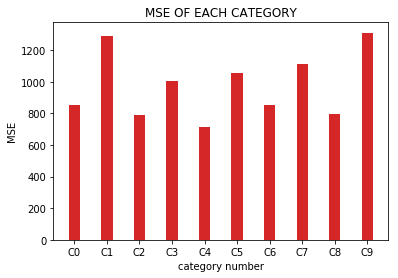

In [20]:
%matplotlib inline  
import matplotlib.pyplot as plt
N = 10
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, mse, width, color='#d62728')
plt.ylabel('MSE')
plt.xlabel("category number")
plt.title('MSE OF EACH CATEGORY')
plt.xticks(ind, ('C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'))
print(mse)
plt.show()


In [14]:
# now we do part b using eicoldian distance between classes 
# we will compute eculdean distance amonf the mean images  


((3072L, 3072L), (3072L,))


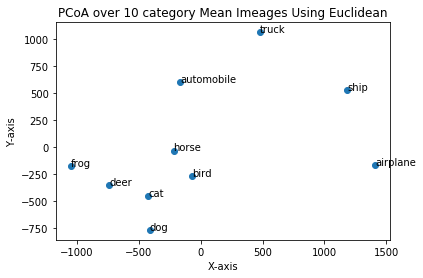

In [19]:
# computing mds using library 
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(mean)
x = X_transformed[:,0]
y = X_transformed[:,1]
plt.scatter(x,y) 
for i in range(0,10):
    plt.annotate(indexes[i],xy=(x[i], y[i]),xycoords='data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("PCoA over 10 category Mean Imeages Using Euclidean")
plt.show()

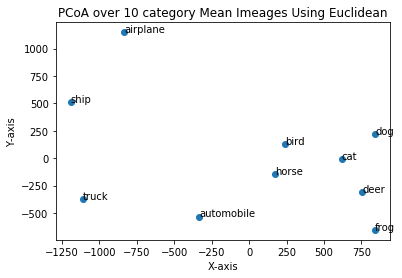

In [18]:
# print(X_transformed)
x = X_transformed[:,0]
y = X_transformed[:,1]
# print(x,y)
plt.scatter(x,y) 
# plt.axvspan(76, 76, facecolor='g', alpha=1)
# plt.annotate('This is awesome!', 
#              xy=(76, 0.75),  
#              xycoords='data',
#              textcoords='offset points',
#              arrowprops=dict(arrowstyle="->"))
# plt.show()
for i in range(0,10):
#     print(i)
    plt.annotate(indexes[i],xy=(x[i], y[i]),xycoords='data')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("PCoA over 10 category Mean Imeages Using Euclidean")
plt.show()

In [14]:
meta = open('cifar-10-batches-py/batches.meta').read()
ground_data0 = unpickle("cifar-10-batches-py//batches.meta") 
indexes = ground_data0['label_names']
indexes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [83]:
# # np.where(labels==1) 
# idxs = np.where(labels == 0) 
# arr0 = np.zeros((len(idxs[0]),3072)) 
# for i in range (0,len(idxs[0])): 
    
# idxs = np.where(labels == 1) 
# arr1 = np.zeros((len(idxs[0]),3072))
# idxs = np.where(labels == 2) 
# arr2 = np.zeros((len(idxs[0]),3072))
# idxs = np.where(labels == 3) 
# arr3 = np.zeros((len(idxs[0]),3072))
# idxs = np.where(labels == 4) 
# arr4 = np.zeros((len(idxs[0]),3072))
# idxs = np.where(labels == 5) 
# arr5 = np.zeros((len(idxs[0]),3072))
# idxs = np.where((len(idxs[0]),3072))
# arr6 = np.zeros((len(idxs[0]),3072))
# idxs = np.where(labels == 7) 
# arr7 = np.zeros((len(idxs[0]),3072))
# idxs = np.where(labels == 8) 
# arr8 = np.zeros((len(idxs[0]),3072))
# idxs = np.where(labels == 9) 
# arr9 = np.zeros((len(idxs[0]),3072))
        
        

In [38]:
labels = labels.astype(int) 
data = data.astype(int)

In [84]:
labels = np.transpose(labels)
print(labels) 
data

[[6. 9. 9. ... 1. 1. 5.]]


array([[ 59.,  43.,  50., ..., 140.,  84.,  72.],
       [154., 126., 105., ..., 139., 142., 144.],
       [255., 253., 253., ...,  83.,  83.,  84.],
       ...,
       [ 71.,  60.,  74., ...,  68.,  69.,  68.],
       [250., 254., 211., ..., 215., 255., 254.],
       [ 62.,  61.,  60., ..., 130., 130., 131.]])

In [85]:
np.where(labels == 9)


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([    1,     2,    14, ..., 49971, 49990, 49996], dtype=int64))

[144.97375275 143.8503306  144.45121218 ... 137.89821679 137.77739932
 138.21859347]
[137.30040323 136.88245968 138.09637097 ... 124.45846774 125.28366935
 126.31935484]
[125.39586614 125.38622047 126.60255906 ... 107.50177165 107.09291339
 107.26732283]
[121.8376 121.5458 122.5302 ... 113.1104 112.1806 111.9266]
[106.7614954  106.92023191 108.13934426 ... 100.90903639 100.65053978
 100.40583766]
[107.98289902 107.20663681 108.11685668 ... 105.93973941 104.93485342
 104.58387622]
[114.5819802  113.79485149 114.51247525 ... 101.55168317 101.39960396
 101.80613861]
[136.87181529 135.43968949 136.19068471 ... 106.54000796 107.24840764
 109.01214172]
[146.88251693 146.06292314 146.9524094  ... 116.3964556  117.54121864
 118.82297889]
[168.76688849 168.09437387 168.81750353 ... 126.60657391 127.71163541
 128.77838274]


In [ ]:
holder = np.zeros(3072)
mean = np.zeros((10,3072))
for i in range (0, 10): 
    idxs = (np.where(np.transpose(labels) == i)) 
    idxs = idxs[0]
    holder = np.zeros(3072)
#     print(idxs)
    l = len((idxs)) 
    for x in range (0,l):  
#         print(data[(idxs[x]),:])
        holder = holder + data[(idxs[x]),:]
    holder = holder / l
    mean[i,:] = holder
    print(holder)

In [113]:
# compute mean for each category  
# go through all the ves of eaxch category and find the mean image of that category  

# find  indexes of each category 
holder = np.zeros(3072)
mean = np.zeros((10,3072))
print(holder.shape)
for i in range (0, 10): 
    idxs = (np.where(np.transpose(labels) == i)) 
    holder = np.zeros(3072)
    l = len(np.transpose(idxs[0])) 
    for x in range (0,l):  
#         print(np.shape(data))
        print(np.shape(data[(np.transpose(idxs)[0][x])]))
        holder = holder + data[np.transpose(idxs[0])[x],:] 
    holder = holder / l
    mean[i,:] = holder
print(((np.transpose(idxs)[3,0])))
print(len(mean[2])) 
print(len(data[1002]))

(3072L,)
(3072L,)
(3072L,)


IndexError: index 2 is out of bounds for axis 0 with size 2

In [2]:
# running SVD to GET PCA
P, D, Q = np.linalg.svd(data, full_matrices=False)
print(np.shape(D),np.shape(Q),np.shape(P))
Recon_data = np.matmul(np.matmul(P, np.diag(D)), Q)
print(np.std(data), np.std(Recon_data), np.std(data - Recon_data))

((3072L,), (3072L, 3072L), (10000L, 3072L))
(64.39060047846118, 64.39060047846118, 4.146348132862879e-13)


In [41]:
# go through all the ves of eaxch category and find the mean image of that category  

# find  indexes of each category 
holder = np.zeros(3072)
mean = np.zeros((10,3072))
print(holder.shape)
for i in range (0, 10): 
    idxs = (np.where(np.transpose(labels) == i)) 
    holder = np.zeros(3072)
    l = len(np.transpose(idxs)) 
    for x in range (0,l):  
#         print(np.shape(data))
#         print(np.shape(data[np.transpose(idxs)[x]]))
        holder = holder + data[np.transpose(idxs)[x],:] 
    holder = holder / l
    mean[i,:] = holder
print(len(np.transpose(idxs)))
print(len(mean[2])) 
print(len(data[1002]))

(3072L,)
981
3072
3072


In [59]:
# center data  
scaled_data = np.zeros((10000,3072)) 
for i in range(0,10000): 
    idx = labels[i]
    scaled_data[i] = (data[i] - mean[idx])
print(len(scaled_data[0])) 
# print(mean[:,100])
print(np.mean(scaled_data[:,99])) 
print(np.shape(scaled_data))

3072
1.4551915228366853e-15
(10000L, 3072L)


In [54]:
# now that i have the scaled i want to take the pc of the 20 comps of the scaled data  
# mean is added according to category  
covmat = cov((scaled_data.T))
eigvals,eigvecs = eig(covmat)  
# sorting all g,b,r eigenvectros 
idx = eigvals.argsort()[::-1]   
e = eigvals[idx]
ev = eigvecs[:,idx] 

In [63]:
# print(np.shape(e),np.shape(ev)) 
# now project the data into 20 comps over the whole dataset 
# now do we need to add each mean of each category or over the whole dataset 
proj = np.dot(scaled_data,ev[:,:20])
print(np.shape(proj))
recon = np.dot(proj,np.transpose(ev[:,:20])) + mean[1][:]  
print(np.shape(recon))


(10000L, 20L)
(10000L, 3072L)


In [ ]:
# next is to calc the MSE over the each subset where idx = [0...9]

In [5]:
#split matrix by each category and plot the error of each 
idxs = (np.where(np.transpose(labels) == 4)) 
l,w = np.shape(np.transpose(idxs)) 
# print(idxs)
hold = np.zeros((l,3072))
for i in range (0,l): 
    holder[i] = scaled_data[np.transpose(idxs)[i]]
    
# first thing is to split data by category
# scaled_data = scaled_data.astype(int)
# holder = holder.astype(int)
print(len(scaled_data[4]))
print(holder.shape) 
np.mean(holder[:,3071]) # to make sure that we will get 0 mean


3072
(999L, 3072L)


3.641620427519232e-15

In [69]:
# split vector into r,g,b chaneels so 3 matrices of m*1024; 
from numpy.linalg import eig
from numpy import cov
r = holder[:,:1024] 
g = holder[:,1024:2048]
b = holder [:,2048:]
print(r.shape,g.shape ,b.shape) # now it splitted   

covmat_r = cov((r.T))
eigvals_r,eigvecs_r = eig(covmat_r)  
covmat_g = cov((g.T))
eigvals_g,eigvecs_g = eig(covmat_g)  
covmat_b = cov((b.T))
eigvals_b,eigvecs_b = eig(covmat_b)  
print(np.shape(covmat_r),np.shape(eigvecs_r),np.shape(eigvals_r) )

print(np.shape(covmat_g),np.shape(eigvecs_g),np.shape(eigvals_g) )

print(np.shape(covmat_b),np.shape(eigvecs_b),np.shape(eigvals_b) )

((1L, 1024L), (1L, 1024L), (1L, 1024L))


C:\Users\me89611\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Degrees of freedom <= 0 for slice
  if __name__ == '__main__':
C:\Users\me89611\AppData\Local\Continuum\anaconda2\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Users\me89611\AppData\Local\Continuum\anaconda2\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


LinAlgError: Array must not contain infs or NaNs

In [18]:
# sorting all g,b,r eigenvectros 
idxr = eigvals_r.argsort()[::-1]   
e_r = eigvals_r[idxr]
ev_r = eigvecs_r[:,idxr] 
idxg = eigvals_g.argsort()[::-1]   
e_g = eigvals_g[idxg]
ev_g = eigvecs_g[:,idxg]
idxb = eigvals_b.argsort()[::-1]   
r_b = eigvals_b[idxb]
ev_b = eigvecs_b[:,idxb]

[ 1.22159312e+06+0.00000000e+00j  4.00272964e+05+0.00000000e+00j
  1.30687278e+05+0.00000000e+00j ... -3.16582110e-12-8.84185203e-13j
 -3.28953412e-12+2.37939183e-12j -3.28953412e-12-2.37939183e-12j]


In [35]:
# pca using first 20 comps over the three channels
# red channel 
l,w = np.shape(r)
img_recon = np.zeros((l,3072))
projr = np.dot(r,ev_r[:,:20])
reconr = np.dot(projr,np.transpose(ev_r[:,:20])) + mean[1][:1024]  
# green chaneel
projg = np.dot(g,ev_g[:,:20])
recong = np.dot(projg,np.transpose(ev_g[:,:20])) + mean[1][1024:2048]  
# blue channel
projb = np.dot(b,ev_b[:,:20])
reconb = np.dot(projb,np.transpose(ev_b[:,:20])) + mean[1][2048:]  
img_recon[:,:1024] = reconr 
img_recon[:,1024:2048] = recong 
img_recon[:,2048:] = reconb
print(img_recon[199:205,100:101])

[[113.41319073]
 [106.91156791]
 [111.47522743]
 [139.30755793]
 [124.83633489]
 [127.77917919]]


C:\Users\me89611\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
C:\Users\me89611\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\me89611\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [25]:
# calulating the MSE OVER each category  
 mse_n1 = ((ndata - img_recon) ** 2).mean(axis = 0)
# print(' mse using noisless comps ' , i, np.mean(mse_n1))  


TypeError: only integer scalar arrays can be converted to a scalar index

In [78]:
ten = np.zeros((10,3072)) 
ten = cov(ten) 
print(ten.shape)
ten, tenn = eig(ten)
print(ten.shape)
print(tenn.shape)



(10L, 10L)
(10L,)
(10L, 10L)
